Dataset: ECG200
X_train shape: (100, 96, 1)
y_train shape: (100,)
--------------------
Normal samples in train set: 69
Abnormal samples in train set: 31


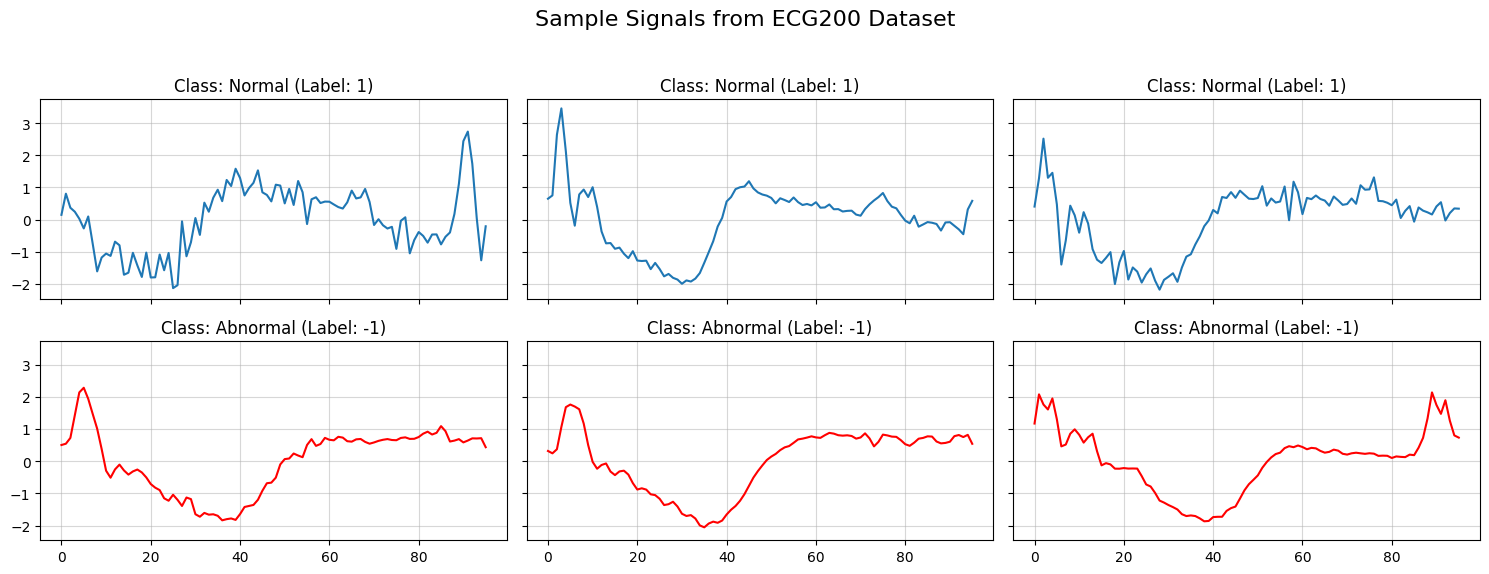

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Load the processed ECG200 data ---
DATASET_NAME = "ECG200"
# Add allow_pickle=True to safely load the string-based label arrays
with np.load(f"../data/{DATASET_NAME}.npz", allow_pickle=True) as data:
    X_train = data['X_train']
    y_train = data['y_train']
    X_test = data['X_test']
    y_test = data['y_test']

print(f"Dataset: {DATASET_NAME}")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("-" * 20)

# The labels are strings '1.0' and '-1.0'. Let's convert them to integers for easier use.
y_train = y_train.astype(float).astype(int)
y_test = y_test.astype(float).astype(int)

# --- Visualize samples from each class ---
# Find indices for each class
normal_indices = np.where(y_train == 1)[0]
abnormal_indices = np.where(y_train == -1)[0]

print(f"Normal samples in train set: {len(normal_indices)}")
print(f"Abnormal samples in train set: {len(abnormal_indices)}")

# Plot a few examples
fig, axs = plt.subplots(2, 3, figsize=(15, 6), sharex=True, sharey=True)
fig.suptitle(f'Sample Signals from {DATASET_NAME} Dataset', fontsize=16)

# Plot normal heartbeats
for i, ax in enumerate(axs[0]):
    ax.plot(X_train[normal_indices[i]].flatten())
    ax.set_title(f"Class: Normal (Label: 1)")
    ax.grid(True, alpha=0.5)

# Plot abnormal heartbeats
for i, ax in enumerate(axs[1]):
    ax.plot(X_train[abnormal_indices[i]].flatten(), color='red')
    ax.set_title(f"Class: Abnormal (Label: -1)")
    ax.grid(True, alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()